In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
data_dir = data_dir / "flower_photos"


In [6]:
import os

print(data_dir)
print(os.listdir(data_dir))

datasets/flower_photos/flower_photos
['sunflowers', 'tulips', 'dandelion', 'LICENSE.txt', 'daisy', 'roses']


In [7]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/flower_photos/sunflowers/9538283930_0faea083bb_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/287233531_74d4605814_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/9216286162_6ceefdd1b4_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/2927020075_54c9186797_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/20078409301_aa8061bd0b_n.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17040847367_b54d05bf52.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14154164774_3b39d36778.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3751835302_d5a03f55e8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3655527028_0fab2b547d_n.jpg')]

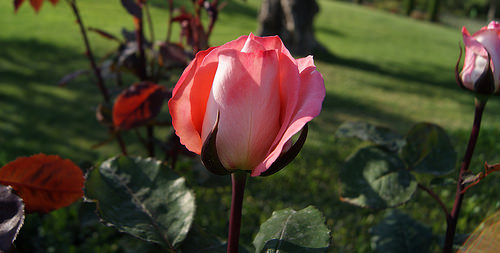

In [10]:
PIL.Image.open(str(roses[1]))

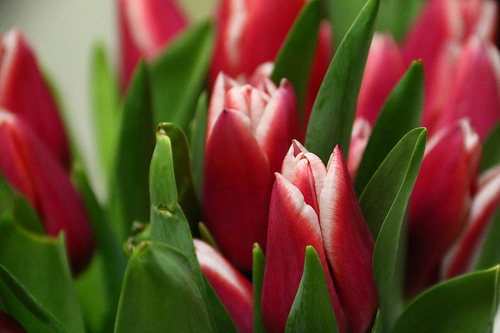

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 160, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X,y=[],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train.shape

(2752, 180, 180, 3)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.3909 - loss: 1.5539
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6162 - loss: 0.9692
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7180 - loss: 0.7603
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.7923 - loss: 0.6090
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.8560 - loss: 0.4052
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9287 - loss: 0.2266
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9632 - loss: 0.1295
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9818 - loss: 0.0642
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9894 - loss: 0.0486
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9854 - loss: 0.0518


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 389ms/step - accuracy: 0.5843 - loss: 1.8481


[1.8338369131088257, 0.5915032625198364]

In [24]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 425ms/step


array([[ 2.0357451 ,  3.6996865 ,  1.1849891 , -1.8718214 , -0.61752856],
       [ 3.935926  ,  1.4447248 ,  2.1045005 , -6.9653115 ,  2.3301835 ],
       [ 3.336164  , -0.7253311 , 13.477243  , -9.999496  , -1.777704  ],
       ...,
       [-2.1463027 , -1.3887576 ,  2.0093186 ,  6.5186105 ,  0.29368648],
       [ 3.1254554 , -1.3015091 ,  6.935012  ,  1.1907241 , -2.5232787 ],
       [-3.746951  , -6.2052774 ,  4.830463  , 10.812285  ,  2.1665728 ]],
      dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.14710899, 0.7767473 , 0.06282905, 0.00295532, 0.01035946],
      dtype=float32)>

In [26]:
np.argmax(score)

np.int64(1)

In [27]:
y_test[0]

np.int64(1)

In [28]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


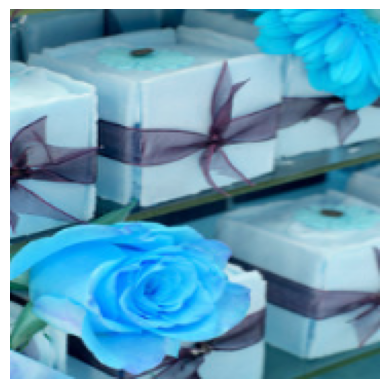

In [29]:
plt.axis('off')
plt.imshow(X[0])

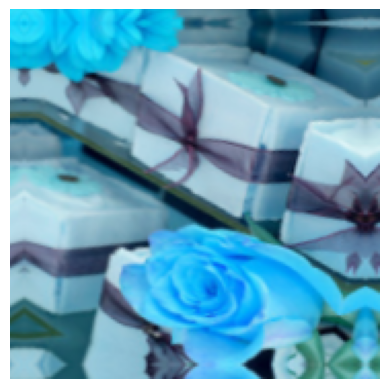

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [31]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.3801 - loss: 1.5817
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5787 - loss: 1.0678
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.6555 - loss: 0.9188
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6753 - loss: 0.8537
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6945 - loss: 0.8023
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7167 - loss: 0.7463
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.7233 - loss: 0.7379
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7351 - loss: 0.6884
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7469 - loss: 0.6727
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7607 - loss: 0.6377
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7832 - loss: 0.5645
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy:

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.7103 - loss: 0.8935


[0.8311929702758789, 0.7298474907875061]